In [1]:
import sys  
sys.path.insert(0, '../005_src/') #use relative path
from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions graph import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



* check that the old functions are not called anywhere -> change their names or move them one folder down
* imports seem successful

In [8]:
print (os.getenv('CONDA_PREFIX'))

/usr/prakt/s0014/anaconda3/envs/p37_GCN


In [2]:
user = os.getenv('JUPYTERHUB_USER')
print (user)

None


#--------------------------------
## DEBUGGING OPTIONS
#--------------------------------

In [2]:
#--------------------------------
## DEBUGGING OPTIONS
#--------------------------------
# mark True during dubugging to trigger the prints
printstat = True 


#--------------------------------
## INPUT 
#--------------------------------

In [3]:
#--------------------------------
## INPUT 
#--------------------------------

# TODO: make it to select from xml or csv or pkl df
# either with glob or os.listdir

# TEST read df 
load_df = 6 # do not read before 4, the columns were different
l = '%06d' % load_df
dataframes_path = os.path.join(DATA_FOLDER ,"dataframes/")
data_path = os.path.join(dataframes_path,f"df_sim_{l}.zip")

print (data_path)

/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/dataframes/df_sim_000006.zip


### sim variables 

In [4]:
# sim variables 
# note: to have a fully connected graph, set the edges radii > 100
edge_creation_radius = 3500 # if the distance between two vehicles is less than this, and edge is created
edge_maintenance_radius = 7000 # if the distance between two vehicles is less than this, and edge is maintened
simulation_max_duration = 100 # Int or None

# saving variables

savestat = True
delete_tempFiles = True
SAVE_TEMP = create_subfolder_with_timestamp(GRAPH_FOLDER) 
minl = 6

#Decide to build the graph visually
plotgraphstat = True

/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/figures/graph/20210629-12h46m40s


#--------------------------------
## Step 1 - Get Input Data in Right Format
#--------------------------------

In [5]:
#--------------------------------
## Step 1 - Get Input Data from dataframe
#--------------------------------
df, limit_duration = step1_select_input_data(data_path, 
                                             printstat, 
                                             simulation_max_duration)
df.sort_values(by=['timestep','vehID'])

there are 204 unique vehicles
   timestep vehID     X       Y    yaw             type  speed    pos  lane  \
0         2     0  92.0  194.90  180.0  DEFAULT_VEHTYPE   0.00   5.10  4i_0   
1         3     0  92.0  192.35  180.0  DEFAULT_VEHTYPE   2.55   7.65  4i_0   
2         4     0  92.0  187.59  180.0  DEFAULT_VEHTYPE   4.76  12.41  4i_0   
3         5     0  92.0  180.42  180.0  DEFAULT_VEHTYPE   7.17  19.58  4i_0   
4         5     1  92.0  194.90  180.0  DEFAULT_VEHTYPE   0.00   5.10  4i_0   

   slope  group  num_collisions  
0    0.0      1               0  
1    0.0      1               0  
2    0.0      1               0  
3    0.0      2               0  
4    0.0      2               0  
the simulation duration is 100 timesteps


,timestep,vehID,X,Y,yaw,type,speed,pos,lane,slope,group,num_collisions,intention
0,2,0,92.00,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0,1,0,2.0
1,3,0,92.00,192.35,180.0,DEFAULT_VEHTYPE,2.55,7.65,4i_0,0.0,1,0,2.0
2,4,0,92.00,187.59,180.0,DEFAULT_VEHTYPE,4.76,12.41,4i_0,0.0,1,0,2.0
3,5,0,92.00,180.42,180.0,DEFAULT_VEHTYPE,7.17,19.58,4i_0,0.0,2,0,2.0
4,5,1,92.00,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0,2,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,101,11,108.00,85.40,0.0,DEFAULT_VEHTYPE,0.00,85.40,3i_0,0.0,14,0,1.0
467,101,12,114.87,108.00,270.0,DEFAULT_VEHTYPE,3.46,85.13,2i_0,0.0,14,0,3.0
468,101,13,148.69,108.00,270.0,DEFAULT_VEHTYPE,13.11,51.31,2i_0,0.0,14,0,3.0
469,101,6,92.00,114.60,180.0,DEFAULT_VEHTYPE,0.00,85.40,4i_0,0.0,14,0,3.0


#--------------------------------
## Step 2 - Add Edge Information
#--------------------------------

In [6]:
#--------------------------------
## Step 2 - Add Edge Information
#--------------------------------
df_with_edges = step2_add_edges_information(df, 
                                            edge_creation_radius, 
                                            edge_maintenance_radius, 
                                            printstat= False)
df_with_edges 

../005_src/_01_functions/_03_functions_graph.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["edge"] = edges_list


,timestep,veh_a,veh_b,"(xa,ya)","(xb,yb)",distance,edge_c,edge_m,edge
9,34,6,7,"(92.0, 118.94)","(194.9, 108.0)",103.479919,1,1,True
9,35,6,7,"(92.0, 114.99)","(192.59, 108.0)",100.832575,1,1,True
9,36,6,7,"(92.0, 114.79)","(187.76, 104.8)",96.279685,1,1,True
9,37,6,7,"(92.0, 114.69)","(181.01, 104.8)",89.557759,1,1,True
9,38,6,7,"(92.0, 114.6)","(172.54, 104.8)",81.134035,1,1,True
...,...,...,...,...,...,...,...,...,...
5,61,5,8,"(77.9, 98.4)","(108.0, 132.68)",45.619386,1,1,True
5,62,5,8,"(77.9, 98.4)","(108.0, 144.63)",55.165414,1,1,True
5,63,5,8,"(77.9, 98.4)","(108.0, 158.72)",67.412999,1,1,True
5,64,5,8,"(77.9, 98.4)","(108.0, 175.4)",82.674119,1,1,True


#--------------------------------
## Step 3 - Build Graph
#--------------------------------

In [7]:
#--------------------------------
## Step 3 - Build Graph
#--------------------------------
dict_edges_per_frame,titleGif = step3_build_graph(df_with_edges, 
                                                      edge_creation_radius, 
                                                      edge_maintenance_radius,
                                                      SAVE_TEMP, 
                                                      date, 
                                                      ts, 
                                                      delete_tempFiles, 
                                                      minl, 
                                                      printstat, 
                                                      savestat,
                                                      plotgraphstat,
                                                      opt = 1
                                                     )

  1%|          | 1/97 [00:00<00:10,  9.53it/s]

/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/figures/graph/20210629-12h46m40s
found 97 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/figures/graph/20210629-12h46m40s


100%|██████████| 97/97 [00:07<00:00, 13.79it/s]

deleted path: ../004_data/figures/graph/20210629-12h46m40s
building the graph and returing edges
graph visualization saved in ../004_data/gifs/20210629-12h46m40s_em7000_ec3500_opt_1_graph.gif


<Figure size 864x864 with 0 Axes>

In [8]:
dict_edges_per_frame

{5: {('0', '1'): 0.4},
 6: {('0', '1'): 0.4},
 7: {('1', '2'): 0.7, ('0', '1'): 0.4, ('0', '2'): 0.8},
 8: {('1', '2'): 0.8, ('0', '1'): 0.4, ('0', '2'): 0.9},
 9: {('1', '2'): 0.8, ('0', '1'): 0.5, ('0', '2'): 0.9},
 10: {('2', '3'): 0.6,
  ('1', '3'): 0.4,
  ('1', '2'): 0.8,
  ('0', '3'): 0.4,
  ('0', '1'): 0.5,
  ('0', '2'): 0.9},
 11: {('2', '3'): 0.6,
  ('1', '3'): 0.4,
  ('1', '2'): 0.8,
  ('0', '3'): 0.4,
  ('0', '1'): 0.5,
  ('0', '2'): 0.8},
 12: {('2', '3'): 0.6,
  ('1', '3'): 0.4,
  ('1', '2'): 0.7,
  ('0', '3'): 0.4,
  ('0', '1'): 0.5,
  ('0', '2'): 0.8},
 13: {('2', '3'): 0.5,
  ('1', '3'): 0.4,
  ('1', '2'): 0.7,
  ('0', '3'): 0.4,
  ('0', '1'): 0.5,
  ('0', '2'): 0.7},
 14: {('2', '3'): 0.5,
  ('1', '3'): 0.4,
  ('1', '2'): 0.6,
  ('0', '3'): 0.4,
  ('0', '1'): 0.5,
  ('0', '2'): 0.6},
 15: {('2', '3'): 0.5,
  ('1', '3'): 0.5,
  ('2', '4'): 1.2,
  ('1', '4'): 1.0,
  ('1', '2'): 0.6,
  ('3', '4'): 0.7,
  ('0', '3'): 0.4,
  ('0', '4'): 0.9,
  ('0', '1'): 0.5,
  ('0', '2'):

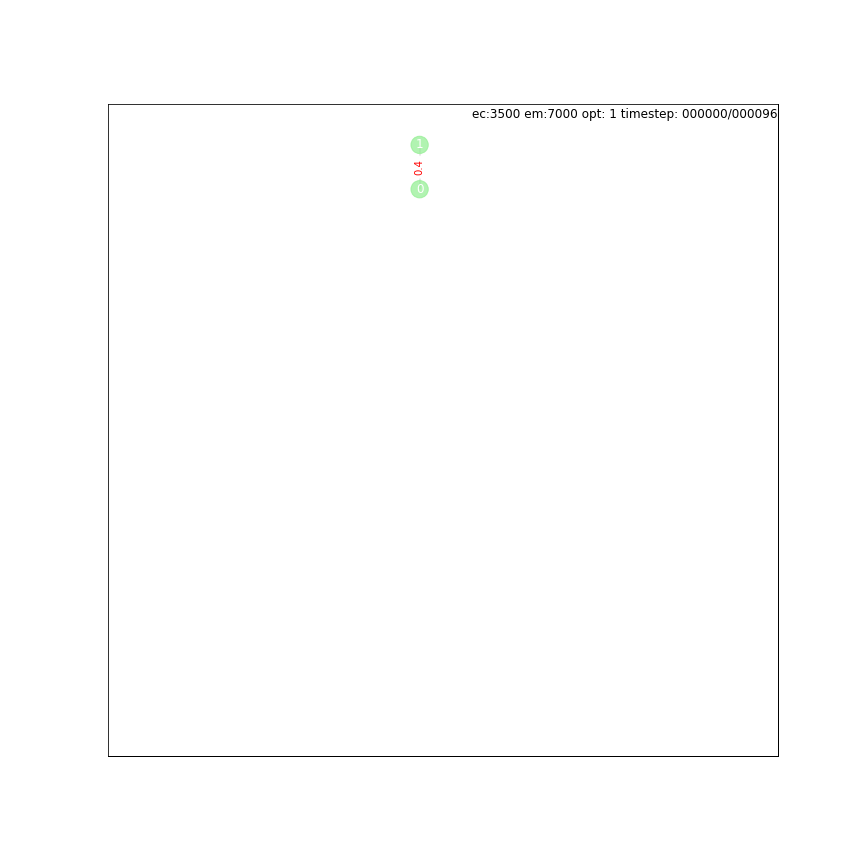

In [9]:
Image(open(f'{titleGif}','rb').read())

Note how opt 1 for weighting the edges overweights pairs that are very distant from each other.

In [10]:
#--------------------------------
## Step 3 - Build Graph
#--------------------------------
SAVE_TEMP = create_subfolder_with_timestamp(GRAPH_FOLDER) 
dict_edges_per_frame,titleGif = step3_build_graph(df_with_edges, 
                                                      edge_creation_radius, 
                                                      edge_maintenance_radius,
                                                      SAVE_TEMP, 
                                                      date, 
                                                      ts, 
                                                      delete_tempFiles, 
                                                      minl, 
                                                      printstat, 
                                                      savestat,
                                                      plotgraphstat,
                                                      opt = 2
                                                     )

/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/figures/graph/20210629-12h47m02s


  1%|          | 1/97 [00:00<00:10,  9.48it/s]

/storage/remote/atcremers50/ss21_multiagentcontrol/004_data/figures/graph/20210629-12h47m02s
found 97 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/figures/graph/20210629-12h47m02s


100%|██████████| 97/97 [00:07<00:00, 13.40it/s]

deleted path: ../004_data/figures/graph/20210629-12h47m02s
building the graph and returing edges
graph visualization saved in ../004_data/gifs/20210629-12h46m40s_em7000_ec3500_opt_2_graph.gif


<Figure size 864x864 with 0 Axes>

In [11]:
dict_edges_per_frame

{5: {('0', '1'): 1.1},
 6: {('0', '1'): 1.1},
 7: {('1', '2'): 1.1, ('0', '1'): 1.1, ('0', '2'): 1.1},
 8: {('1', '2'): 1.1, ('0', '1'): 1.2, ('0', '2'): 1.1},
 9: {('1', '2'): 1.1, ('0', '1'): 1.3, ('0', '2'): 1.1},
 10: {('2', '3'): 1.1,
  ('1', '3'): 1.1,
  ('1', '2'): 1.2,
  ('0', '3'): 1.1,
  ('0', '1'): 1.5,
  ('0', '2'): 1.2},
 11: {('2', '3'): 1.1,
  ('1', '3'): 1.1,
  ('1', '2'): 1.3,
  ('0', '3'): 1.1,
  ('0', '1'): 1.8,
  ('0', '2'): 1.3},
 12: {('2', '3'): 1.1,
  ('1', '3'): 1.1,
  ('1', '2'): 1.5,
  ('0', '3'): 1.1,
  ('0', '1'): 2.3,
  ('0', '2'): 1.5},
 13: {('2', '3'): 1.2,
  ('1', '3'): 1.2,
  ('1', '2'): 1.9,
  ('0', '3'): 1.2,
  ('0', '1'): 3.3,
  ('0', '2'): 1.9},
 14: {('2', '3'): 1.3,
  ('1', '3'): 1.3,
  ('1', '2'): 2.6,
  ('0', '3'): 1.3,
  ('0', '1'): 4.6,
  ('0', '2'): 2.6},
 15: {('2', '3'): 1.5,
  ('1', '3'): 1.5,
  ('2', '4'): 1.1,
  ('1', '4'): 1.1,
  ('1', '2'): 3.6,
  ('3', '4'): 1.1,
  ('0', '3'): 1.5,
  ('0', '4'): 1.1,
  ('0', '1'): 2.8,
  ('0', '2'):

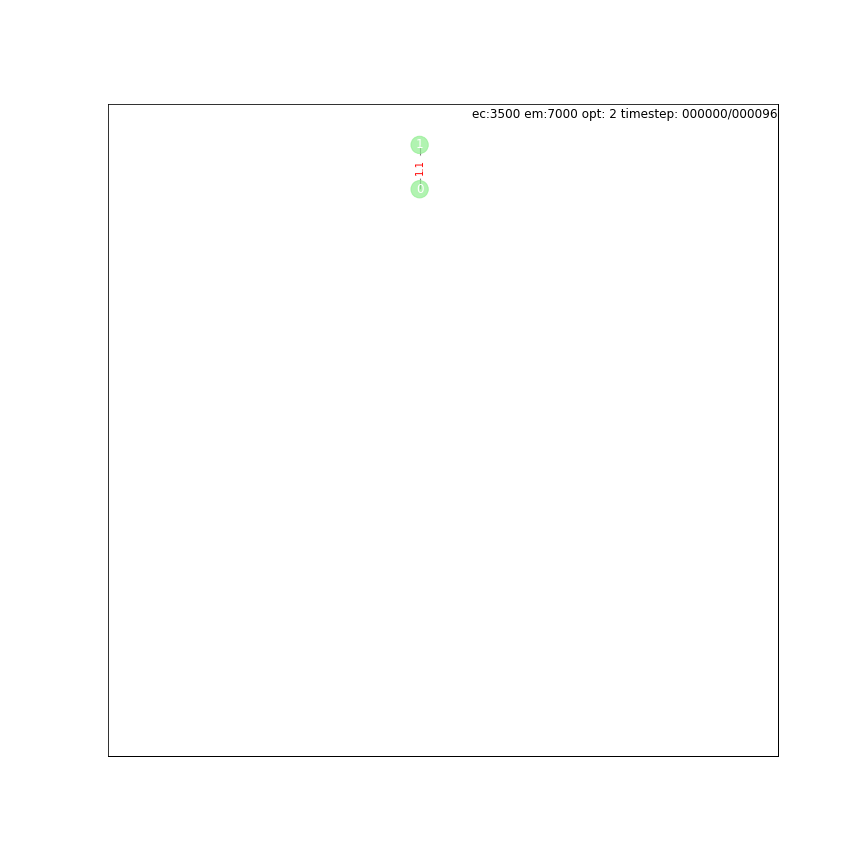

In [12]:
Image(open(f'{titleGif}','rb').read())

#--------------------------------
## Step 4 - Get GCN Input
#--------------------------------

In [13]:
dict_edges_per_frame

{5: {('0', '1'): 1.1},
 6: {('0', '1'): 1.1},
 7: {('1', '2'): 1.1, ('0', '1'): 1.1, ('0', '2'): 1.1},
 8: {('1', '2'): 1.1, ('0', '1'): 1.2, ('0', '2'): 1.1},
 9: {('1', '2'): 1.1, ('0', '1'): 1.3, ('0', '2'): 1.1},
 10: {('2', '3'): 1.1,
  ('1', '3'): 1.1,
  ('1', '2'): 1.2,
  ('0', '3'): 1.1,
  ('0', '1'): 1.5,
  ('0', '2'): 1.2},
 11: {('2', '3'): 1.1,
  ('1', '3'): 1.1,
  ('1', '2'): 1.3,
  ('0', '3'): 1.1,
  ('0', '1'): 1.8,
  ('0', '2'): 1.3},
 12: {('2', '3'): 1.1,
  ('1', '3'): 1.1,
  ('1', '2'): 1.5,
  ('0', '3'): 1.1,
  ('0', '1'): 2.3,
  ('0', '2'): 1.5},
 13: {('2', '3'): 1.2,
  ('1', '3'): 1.2,
  ('1', '2'): 1.9,
  ('0', '3'): 1.2,
  ('0', '1'): 3.3,
  ('0', '2'): 1.9},
 14: {('2', '3'): 1.3,
  ('1', '3'): 1.3,
  ('1', '2'): 2.6,
  ('0', '3'): 1.3,
  ('0', '1'): 4.6,
  ('0', '2'): 2.6},
 15: {('2', '3'): 1.5,
  ('1', '3'): 1.5,
  ('2', '4'): 1.1,
  ('1', '4'): 1.1,
  ('1', '2'): 3.6,
  ('3', '4'): 1.1,
  ('0', '3'): 1.5,
  ('0', '4'): 1.1,
  ('0', '1'): 2.8,
  ('0', '2'):

In [14]:
#--------------------------------
## Step 4 - Get GCN Input
#--------------------------------
data_dict = step4_get_gcn_input(df, 
                                df_with_edges,
                                dict_edges_per_frame,
                                printstat)

  0%|          | 0/92 [00:00<?, ?it/s]

there are 2 unique vehicles in timestep 5
there are 2 unique vehicles in timestep 6
there are 3 unique vehicles in timestep 7
there are 3 unique vehicles in timestep 8
there are 3 unique vehicles in timestep 9
there are 4 unique vehicles in timestep 10
there are 4 unique vehicles in timestep 11


 14%|█▍        | 13/92 [00:00<00:00, 126.23it/s]

there are 4 unique vehicles in timestep 12
there are 4 unique vehicles in timestep 13
there are 4 unique vehicles in timestep 14
there are 5 unique vehicles in timestep 15
there are 5 unique vehicles in timestep 16
there are 5 unique vehicles in timestep 17
there are 5 unique vehicles in timestep 18
there are 5 unique vehicles in timestep 19
there are 5 unique vehicles in timestep 20
there are 5 unique vehicles in timestep 21
there are 5 unique vehicles in timestep 22
there are 5 unique vehicles in timestep 23
there are 5 unique vehicles in timestep 24
there are 5 unique vehicles in timestep 25
there are 5 unique vehicles in timestep 26
there are 5 unique vehicles in timestep 27
there are 5 unique vehicles in timestep 28
there are 5 unique vehicles in timestep 29


 28%|██▊       | 26/92 [00:00<00:00, 121.07it/s]

there are 5 unique vehicles in timestep 30
there are 5 unique vehicles in timestep 31
there are 5 unique vehicles in timestep 32
there are 5 unique vehicles in timestep 33
there are 5 unique vehicles in timestep 34
there are 5 unique vehicles in timestep 35
there are 5 unique vehicles in timestep 36


 42%|████▏     | 39/92 [00:00<00:00, 102.15it/s]

there are 5 unique vehicles in timestep 37
there are 5 unique vehicles in timestep 38
there are 5 unique vehicles in timestep 39
there are 5 unique vehicles in timestep 40
there are 5 unique vehicles in timestep 41
there are 5 unique vehicles in timestep 42
there are 5 unique vehicles in timestep 43
there are 5 unique vehicles in timestep 44
there are 5 unique vehicles in timestep 45
there are 5 unique vehicles in timestep 46
there are 5 unique vehicles in timestep 47
there are 5 unique vehicles in timestep 48
there are 5 unique vehicles in timestep 49


 54%|█████▍    | 50/92 [00:00<00:00, 98.91it/s] 

there are 5 unique vehicles in timestep 50
there are 5 unique vehicles in timestep 51
there are 5 unique vehicles in timestep 52
there are 5 unique vehicles in timestep 53
there are 5 unique vehicles in timestep 54
there are 5 unique vehicles in timestep 55
there are 5 unique vehicles in timestep 56
there are 5 unique vehicles in timestep 57


 66%|██████▋   | 61/92 [00:00<00:00, 93.48it/s]

there are 5 unique vehicles in timestep 58
there are 5 unique vehicles in timestep 59
there are 5 unique vehicles in timestep 60
there are 5 unique vehicles in timestep 61
there are 5 unique vehicles in timestep 62
there are 5 unique vehicles in timestep 63
there are 5 unique vehicles in timestep 64
there are 5 unique vehicles in timestep 65
there are 5 unique vehicles in timestep 66
there are 5 unique vehicles in timestep 67
there are 5 unique vehicles in timestep 68
there are 5 unique vehicles in timestep 69
there are 5 unique vehicles in timestep 70
there are 5 unique vehicles in timestep 71
there are 5 unique vehicles in timestep 72
there are 5 unique vehicles in timestep 73
there are 5 unique vehicles in timestep 74
there are 5 unique vehicles in timestep 75


 90%|█████████ | 83/92 [00:00<00:00, 97.83it/s]

there are 5 unique vehicles in timestep 76
there are 5 unique vehicles in timestep 77
there are 5 unique vehicles in timestep 78
there are 5 unique vehicles in timestep 79
there are 5 unique vehicles in timestep 80
there are 5 unique vehicles in timestep 81
there are 5 unique vehicles in timestep 82
there are 5 unique vehicles in timestep 83
there are 5 unique vehicles in timestep 84
there are 5 unique vehicles in timestep 85
there are 5 unique vehicles in timestep 86
there are 5 unique vehicles in timestep 87
there are 5 unique vehicles in timestep 88


100%|██████████| 92/92 [00:00<00:00, 101.52it/s]

there are 5 unique vehicles in timestep 89
there are 5 unique vehicles in timestep 90
there are 5 unique vehicles in timestep 91
there are 5 unique vehicles in timestep 92
there are 5 unique vehicles in timestep 93
there are 5 unique vehicles in timestep 94
there are 5 unique vehicles in timestep 95
there are 5 unique vehicles in timestep 96


In [16]:
data_dict

{5: {'data_x': tensor([[180.0000,   7.1700],
          [180.0000,   0.0000]]),
  'data_pos': tensor([[ 92.0000, 180.4200],
          [ 92.0000, 194.9000]]),
  'data_edges': tensor([[0.],
          [1.]]),
  'data_y': tensor([[ 92.0000, 117.4000, 180.0000],
          [ 92.0000, 166.6300, 180.0000]]),
  'data_edges_attr': tensor([1.1000])},
 6: {'data_x': tensor([[180.0000,   9.3300],
          [180.0000,   1.9200]]),
  'data_pos': tensor([[ 92.0000, 171.0900],
          [ 92.0000, 192.9800]]),
  'data_edges': tensor([[0.],
          [1.]]),
  'data_y': tensor([[ 93.1700, 106.6200, 170.4800],
          [ 92.0000, 155.8100, 180.0000]]),
  'data_edges_attr': tensor([1.1000])},
 7: {'data_x': tensor([[180.0000,  11.1400],
          [180.0000,   3.6900],
          [ 90.0000,   0.0000]]),
  'data_pos': tensor([[ 92.0000, 159.9500],
          [ 92.0000, 189.2900],
          [  5.1000,  92.0000]]),
  'data_edges': tensor([[1., 0., 0.],
          [2., 1., 2.]]),
  'data_y': tensor([[ 99.7000,  9